## Maria Angelica Becerra - T00054451

In [155]:
import io
import sys
import os
import pandas as pd
from statistics import mean
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
PATH = '/Users/Salas de Informática/Downloads/'
DIR_DATA = '../Data/'
sys.path.append(PATH) if PATH not in list(sys.path) else None
filename = DIR_DATA + 'test_diabetes.csv'

In [116]:
pip install plotly

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

In [118]:
# Load the diabetes dataset
test_diabetes, train_diabetes = datasets.load_diabetes(return_X_y=True)

In [119]:
df_train = pd.DataFrame(train_diabetes)
df_train.head()

,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


In [120]:
df_train.describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


In [121]:
test_diabetes

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [122]:
test_diabetes = test_diabetes[:, np.newaxis, 2]

In [123]:

diabetes_X_train = test_diabetes[:-20]
diabetes_X_test = test_diabetes[-20:]

diabetes_y_train = train_diabetes[:-20]
diabetes_y_test = train_diabetes[-20:]

In [124]:
len(diabetes_X_train), len(diabetes_X_test)

(422, 20)

In [125]:
df.columns = ['Número embarazos',
'Concentración de glucosa en plasma'
,'Presión arterial diastólica',
'Espesor del pliegue cutáneo',
'Insulina sérica',
'Índice de masa corporal',
'Función de pedigrí diabetes',
'Edad','Variable clase', 'Distribución clases']
df.columns

Index(['Número embarazos', 'Concentración de glucosa en plasma',
       'Presión arterial diastólica', 'Espesor del pliegue cutáneo',
       'Insulina sérica', 'Índice de masa corporal',
       'Función de pedigrí diabetes', 'Edad', 'Variable clase',
       'Distribución clases'],
      dtype='object')

In [126]:
df.head()

,Número embarazos,Concentración de glucosa en plasma,Presión arterial diastólica,Espesor del pliegue cutáneo,Insulina sérica,Índice de masa corporal,Función de pedigrí diabetes,Edad,Variable clase,Distribución clases
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [127]:
d =pd.DataFrame(df["Concentración de glucosa en plasma"].value_counts())
fig = px.pie(d, values ="Concentración de glucosa en plasma", names=["Diabetes tipo 1", "Diabetes tipo 2"], hole = 0.4, opacity=0.8,
            labels={"label":"Potability","Potability":"Number of Samples"})
fig.update_layout(title = dict(text="Pie Chart of Potability Feature"))
fig.update_traces(textposition="outside",textinfo="percent+label")
fig.show()

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
Número embarazos                      442 non-null float64
Concentración de glucosa en plasma    442 non-null float64
Presión arterial diastólica           442 non-null float64
Espesor del pliegue cutáneo           442 non-null float64
Insulina sérica                       442 non-null float64
Índice de masa corporal               442 non-null float64
Función de pedigrí diabetes           442 non-null float64
Edad                                  442 non-null float64
Variable clase                        442 non-null float64
Distribución clases                   442 non-null float64
dtypes: float64(10)
memory usage: 34.7 KB


In [129]:
# Create linear regression object
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [130]:
diabetes_y_pred = regr.predict(diabetes_X_test)
diabetes_y_pred

array([225.9732401 , 115.74763374, 163.27610621, 114.73638965,
       120.80385422, 158.21988574, 236.08568105, 121.81509832,
        99.56772822, 123.83758651, 204.73711411,  96.53399594,
       154.17490936, 130.91629517,  83.3878227 , 171.36605897,
       137.99500384, 137.99500384, 189.56845268,  84.3990668 ])

In [131]:
print('Coeficientes: \n', regr.coef_)
print('Media-Error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
print('Determinacion de coeficiente: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

Coeficientes: 
 [938.23786125]
Media-Error: 2548.07
Determinacion de coeficiente: 0.47


In [132]:
log_reg = LogisticRegression()
log_reg.fit(diabetes_X_test, diabetes_y_test)

LogisticRegression()

In [133]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
x_new

array([[0.        ],
       [0.003003  ],
       [0.00600601],
       [0.00900901],
       [0.01201201],
       [0.01501502],
       [0.01801802],
       [0.02102102],
       [0.02402402],
       [0.02702703],
       [0.03003003],
       [0.03303303],
       [0.03603604],
       [0.03903904],
       [0.04204204],
       [0.04504505],
       [0.04804805],
       [0.05105105],
       [0.05405405],
       [0.05705706],
       [0.06006006],
       [0.06306306],
       [0.06606607],
       [0.06906907],
       [0.07207207],
       [0.07507508],
       [0.07807808],
       [0.08108108],
       [0.08408408],
       [0.08708709],
       [0.09009009],
       [0.09309309],
       [0.0960961 ],
       [0.0990991 ],
       [0.1021021 ],
       [0.10510511],
       [0.10810811],
       [0.11111111],
       [0.11411411],
       [0.11711712],
       [0.12012012],
       [0.12312312],
       [0.12612613],
       [0.12912913],
       [0.13213213],
       [0.13513514],
       [0.13813814],
       [0.141

In [134]:
y_prob = log_reg.predict_proba(x_new)

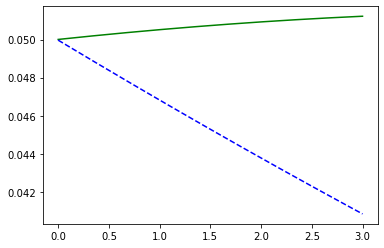

In [135]:
plt.plot(x_new, y_prob[:, 1], "g-", label="A")
plt.plot(x_new, y_prob[:, 0], "b--", label="B")

In [143]:
log_reg.predict([[1.7], [1.5], [1.6]])
log_reg.predict

<bound method LinearClassifierMixin.predict of LogisticRegression()>

In [146]:
softmax = (test_diabetes,train_diabetes)

In [147]:
softmax 

(array([[ 0.06169621],
        [-0.05147406],
        [ 0.04445121],
        [-0.01159501],
        [-0.03638469],
        [-0.04069594],
        [-0.04716281],
        [-0.00189471],
        [ 0.06169621],
        [ 0.03906215],
        [-0.08380842],
        [ 0.01750591],
        [-0.02884001],
        [-0.00189471],
        [-0.02560657],
        [-0.01806189],
        [ 0.04229559],
        [ 0.01211685],
        [-0.0105172 ],
        [-0.01806189],
        [-0.05686312],
        [-0.02237314],
        [-0.00405033],
        [ 0.06061839],
        [ 0.03582872],
        [-0.01267283],
        [-0.07734155],
        [ 0.05954058],
        [-0.02129532],
        [-0.00620595],
        [ 0.04445121],
        [-0.06548562],
        [ 0.12528712],
        [-0.05039625],
        [-0.06332999],
        [-0.03099563],
        [ 0.02289497],
        [ 0.01103904],
        [ 0.07139652],
        [ 0.01427248],
        [-0.00836158],
        [-0.06764124],
        [-0.0105172 ],
        [-0

In [148]:
softmax.fit(test_diabetes, train_diabetes)

AttributeError: 'tuple' object has no attribute 'fit'

In [149]:
y_predict = log_reg.predict(test_diabetes)
y_predict

array([310.,  48., 310.,  48.,  48.,  48.,  48., 310., 310., 310.,  48.,
       310.,  48., 310.,  48.,  48., 310., 310.,  48.,  48.,  48.,  48.,
       310., 310., 310.,  48.,  48., 310.,  48., 310., 310.,  48., 310.,
        48.,  48.,  48., 310., 310., 310., 310., 310.,  48.,  48.,  48.,
       310.,  48.,  48.,  48.,  48., 310., 310., 310., 310.,  48., 310.,
        48., 310.,  48.,  48.,  48., 310., 310., 310.,  48.,  48.,  48.,
        48.,  48.,  48.,  48.,  48., 310., 310.,  48., 310.,  48., 310.,
        48.,  48.,  48., 310.,  48.,  48., 310.,  48., 310.,  48., 310.,
        48.,  48.,  48., 310., 310.,  48.,  48.,  48., 310., 310., 310.,
        48., 310.,  48., 310., 310., 310.,  48.,  48., 310., 310., 310.,
        48., 310., 310., 310., 310., 310., 310.,  48.,  48.,  48., 310.,
       310., 310., 310., 310., 310.,  48., 310.,  48., 310., 310.,  48.,
        48.,  48., 310., 310.,  48., 310., 310., 310., 310., 310., 310.,
       310., 310., 310., 310., 310., 310., 310., 31

In [153]:
print(classification_report(train_diabetes, y_predict))

              precision    recall  f1-score   support

        25.0       0.00      0.00      0.00         1
        31.0       0.00      0.00      0.00         1
        37.0       0.00      0.00      0.00         1
        39.0       0.00      0.00      0.00         2
        40.0       0.00      0.00      0.00         1
        42.0       0.00      0.00      0.00         3
        43.0       0.00      0.00      0.00         1
        44.0       0.00      0.00      0.00         1
        45.0       0.00      0.00      0.00         1
        47.0       0.00      0.00      0.00         2
        48.0       0.01      0.67      0.02         3
        49.0       0.00      0.00      0.00         3
        50.0       0.00      0.00      0.00         1
        51.0       0.00      0.00      0.00         3
        52.0       0.00      0.00      0.00         4
        53.0       0.00      0.00      0.00         4
        54.0       0.00      0.00      0.00         1
        55.0       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [161]:
f1 = f1_score(train_diabetes, y_predict, average="macro")
precision = precision_score(train_diabetes, y_predict, average="macro")
recall = recall_score(train_diabetes, y_predict, average="macro")
accuracy = accuracy_score(train_diabetes, y_predict, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)

F1:  0.0002067446658472967
Precision:  0.00010476916948998753
Recall:  0.0077881619937694695
Accuracy:  0.011312217194570135
